In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#%run Data_Wrangling_Capstone_Two-Copy3.ipynb

In [5]:
#Summary stats of the dataframe
super_data_frame.describe().T

count         mean        std     min      25%  \
Total                    330.0    18.190909  18.599357     0.0     3.00   
Female                   330.0    18.881818  20.502679     0.0     3.00   
Male                     330.0    17.445455  17.129004     0.0     3.25   
Rural_Residence          322.0    22.114907  21.867396     0.0     4.00   
Urban_Residence          322.0    13.021739  13.619306     0.0     3.00   
Poorest_Wealth quintile  306.0    29.614379  25.901990     0.0     6.00   
Second_Wealth quintile   306.0    23.055556  23.248625     0.0     3.00   
Middle_Wealth quintile   306.0    19.078431  20.788089     0.0     3.00   
Fourth_Wealth quintile   306.0    14.617647  17.425275     0.0     2.00   
Richest_Wealth quintile  306.0     9.300654  12.074406     0.0     1.00   
Time period              330.0  2015.496970   2.567329  2010.0  2014.00   

                            50%      75%     max  
Total                      11.0    27.00    86.0  
Female                     10.0    29.00    91.0  
Male                       12.0    26.00    79.0  
Rural_Residence            13.0    35.00    95.0  
Urban_Residence             8.0    19.75    70.0  
Poorest_Wealth quintile    23.5    46.00    99.0  
Second_Wealth quintile     15.0    36.00    97.0  
Middle_Wealth quintile     11.0    29.00    97.0  
Fourth_Wealth quintile      7.0    21.00    92.0  
Richest_Wealth quintile     4.0    13.00    63.0  
Time period              2016.0  2018.00  2019.0

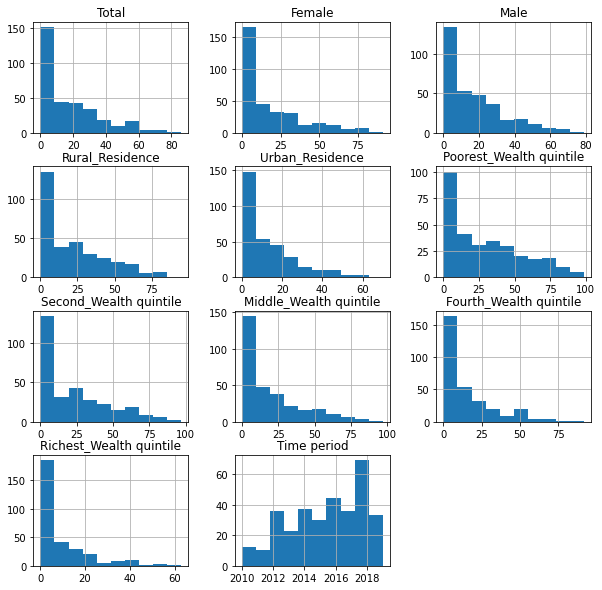

In [6]:
#Histogram for each of the variables of dataframe
sdf_hist = super_data_frame.hist(bins=10, figsize=(10, 10))

In [7]:
#Selecting the object data types to work on separately and running a value count on the Region column.
sdf_cat = super_data_frame.select_dtypes(include='object').copy()

sdf_cat.Region.value_counts()

ECA     162
SSA     147
LAC     111
EAP      99
MENA     57
SA       24
Name: Region, dtype: int64

In [8]:
#Running a value count on the Sub-region column.
sdf_cat['Sub-region'].value_counts()

LAC     111
WE       99
EAP      99
ESA      75
WCA      72
EECA     63
MENA     57
SA       24
Name: Sub-region, dtype: int64

In [9]:
#Running a value count on the Development Regions column.
sdf_cat['Development Regions'].value_counts()

Less Developed     297
More Developed     150
Least Developed    141
Not Classified      18
Name: Development Regions, dtype: int64

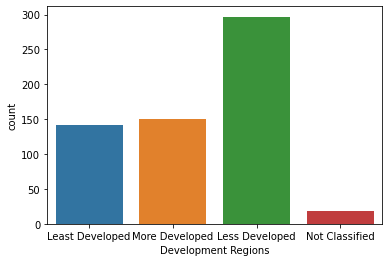

In [10]:
#Running a count plot for the Development Regions column.
sns.countplot(data=sdf_cat, x='Development Regions');

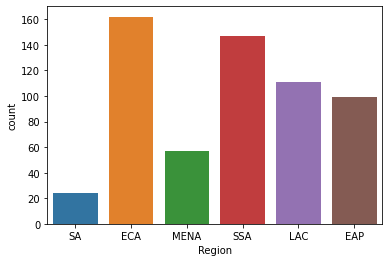

In [11]:
#Running a count plot on the Region column.
sns.countplot(data=sdf_cat, x='Region');

#Forming hypotheses to test out on the data.

#Null hypothesis: Drop out rates of students living in rural areas are about the same across regions regardless of economic development.
#Alternative hypothesis: Student retention rates decrease the more the region is less developed economically.

#Null hypothesis: Drop out rates of students living in urban areas are more stable across regions.
#Alternative hypothesis: Regions in the global south experience a wider variation in their drop out rates of students living in urban areas versus the global north.

#Null hypothesis: The least economically developed regions have about the same rate of drop out rates among students.
#Alternative hypothesis: The rate of drop out among the least economically developed regions is more disproportionately felt
#dependent on the region (SSA, LAC, etc.).

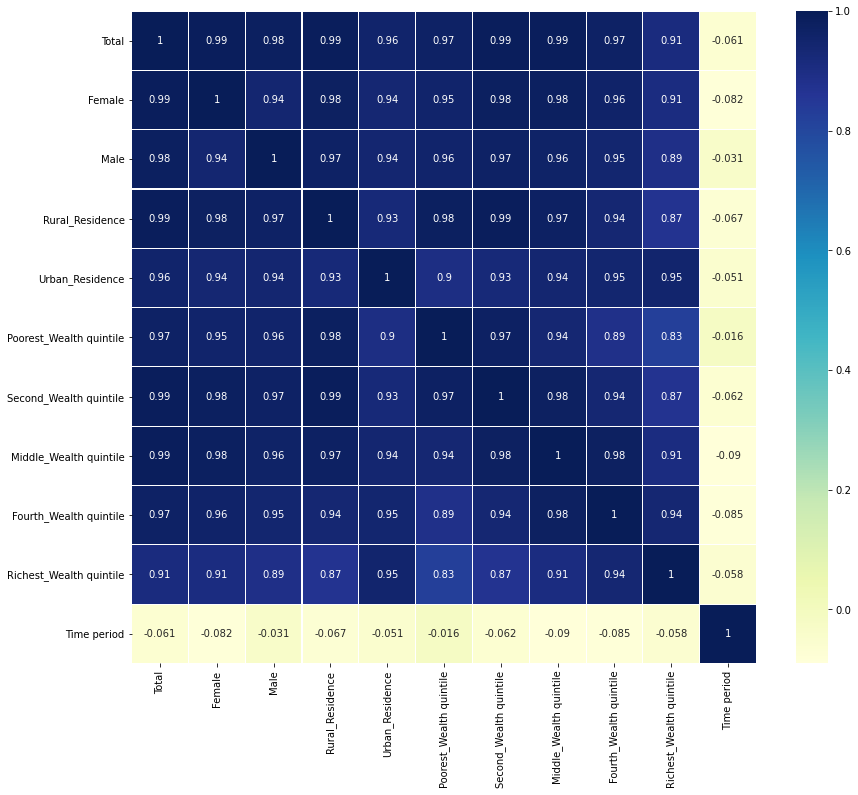

In [12]:
#Finding data relationships through means of a heatmap.
plt.figure(figsize=(14, 12))
sns.heatmap(super_data_frame.corr(), linewidths=0.1, cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

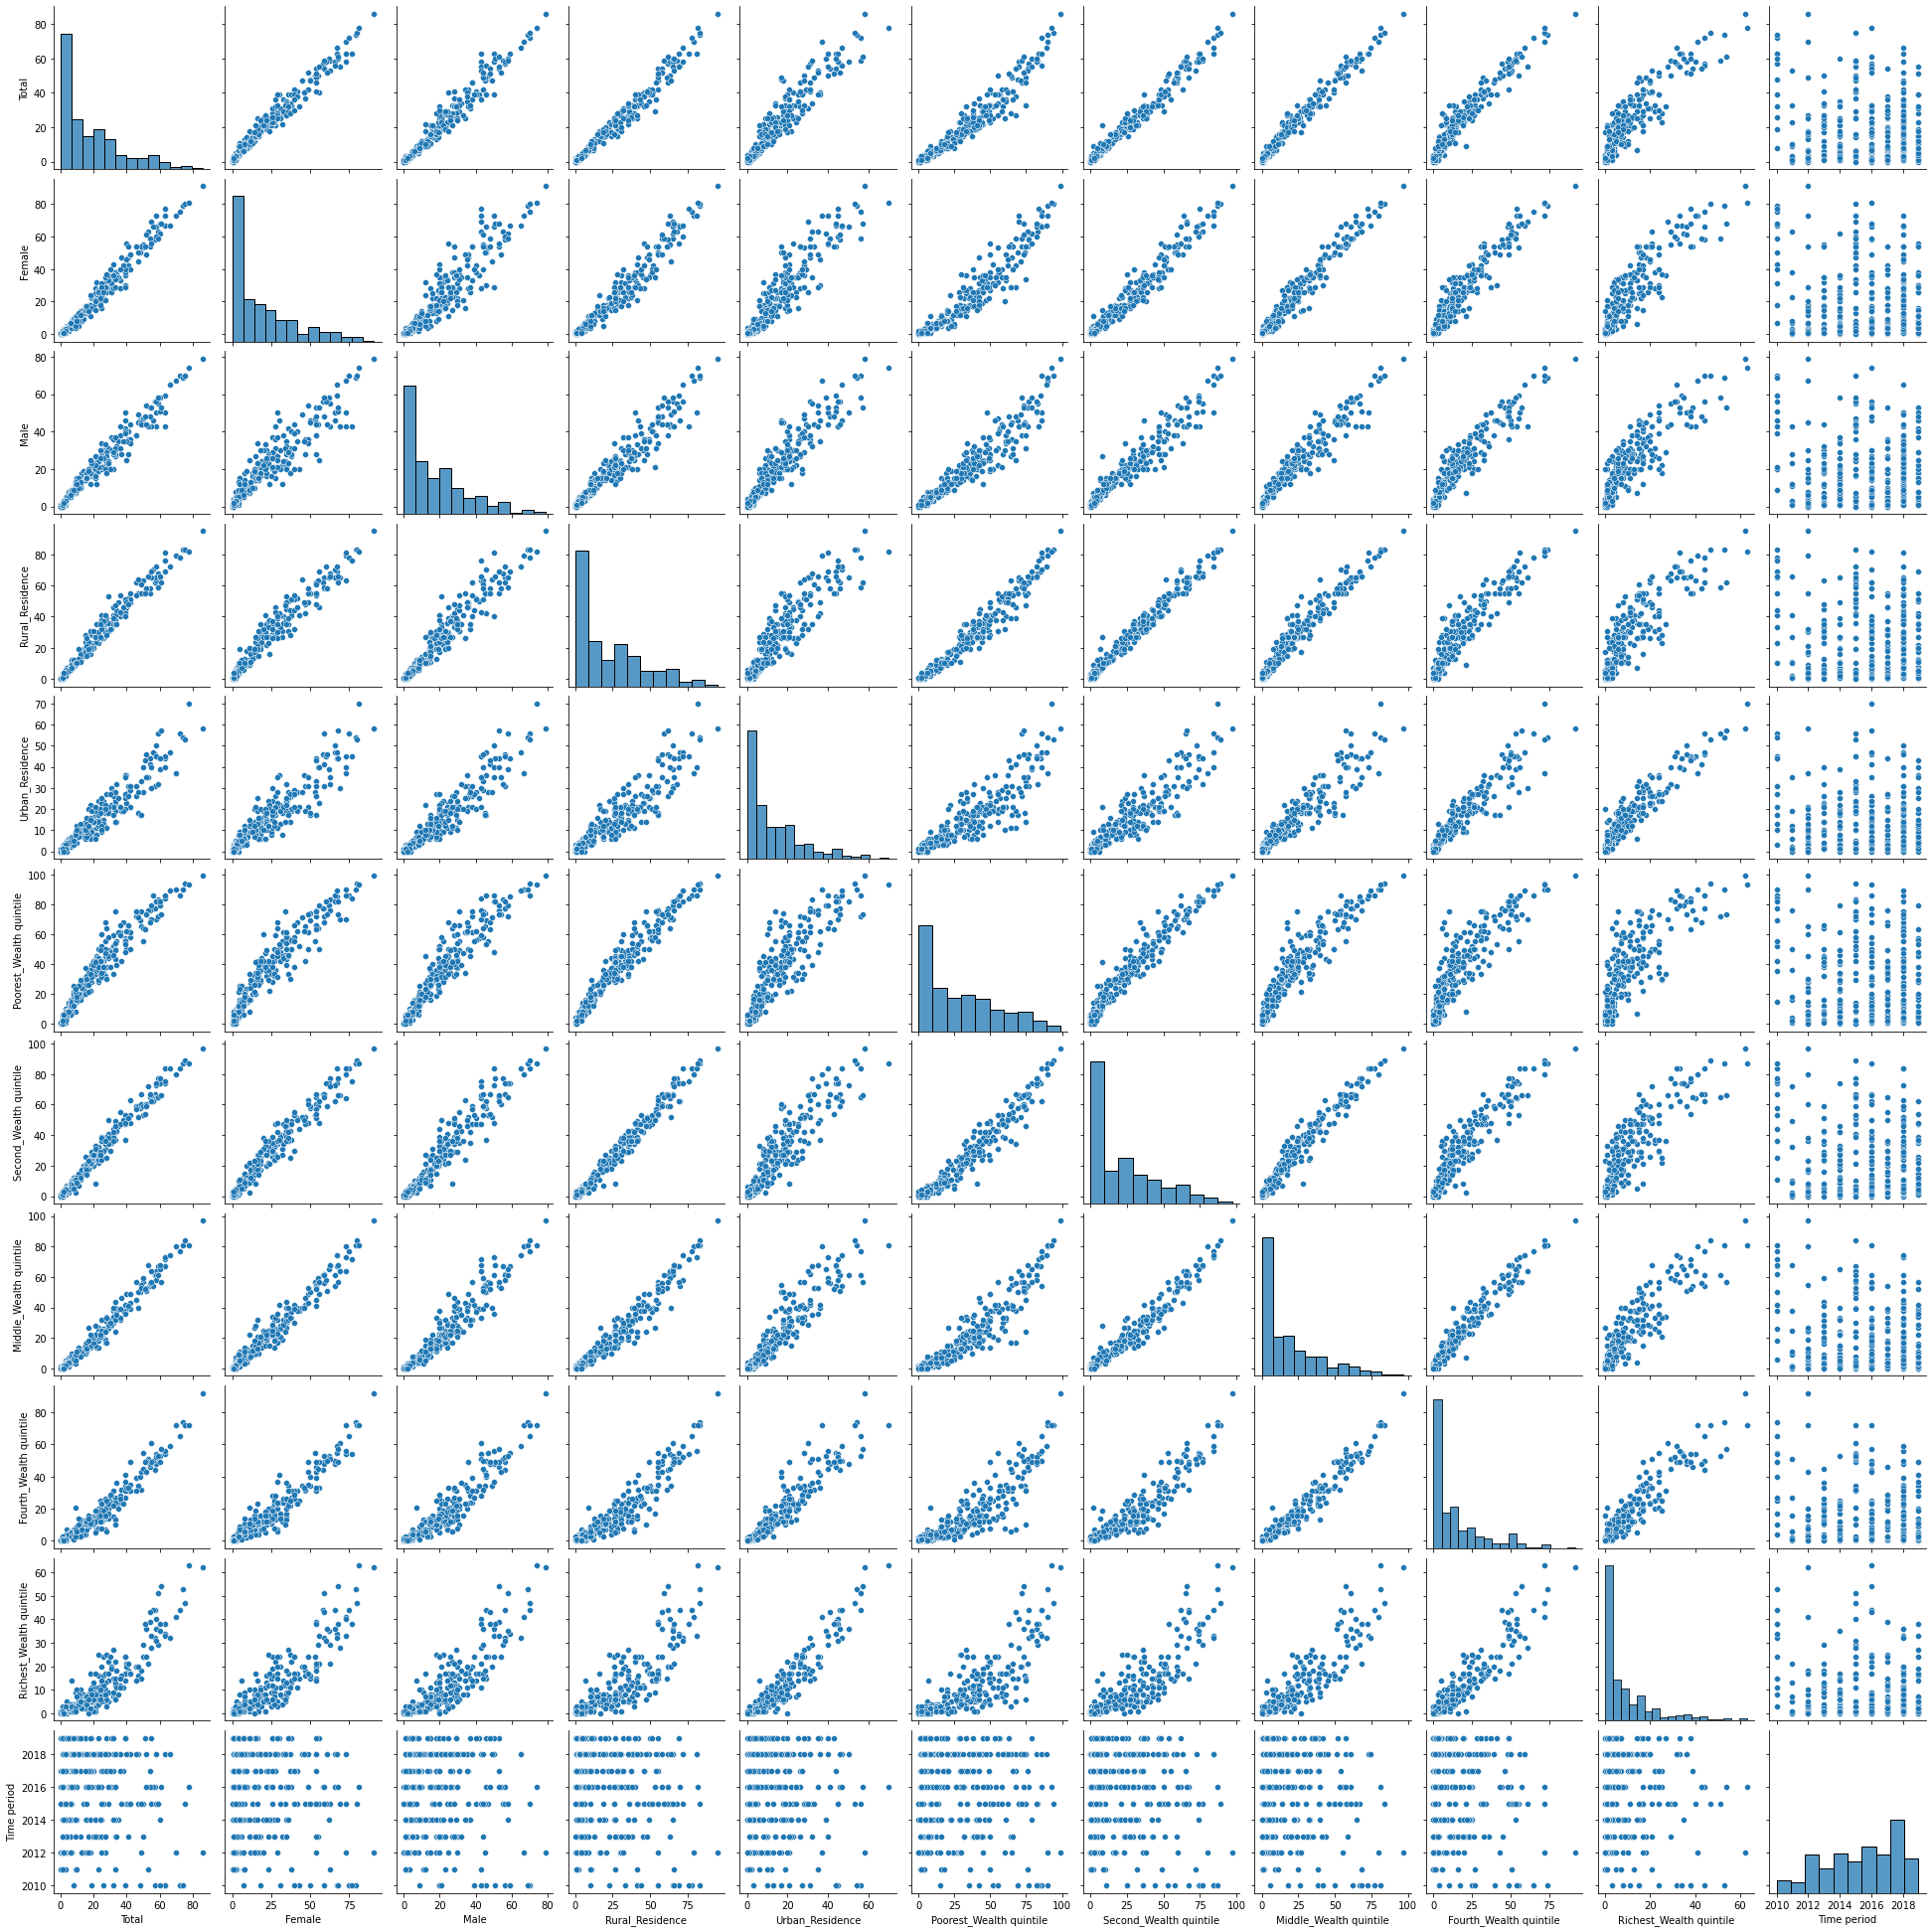

In [13]:
#Exploring variable distributions though the pair plot function.
sdf_pair = sns.pairplot(super_data_frame)

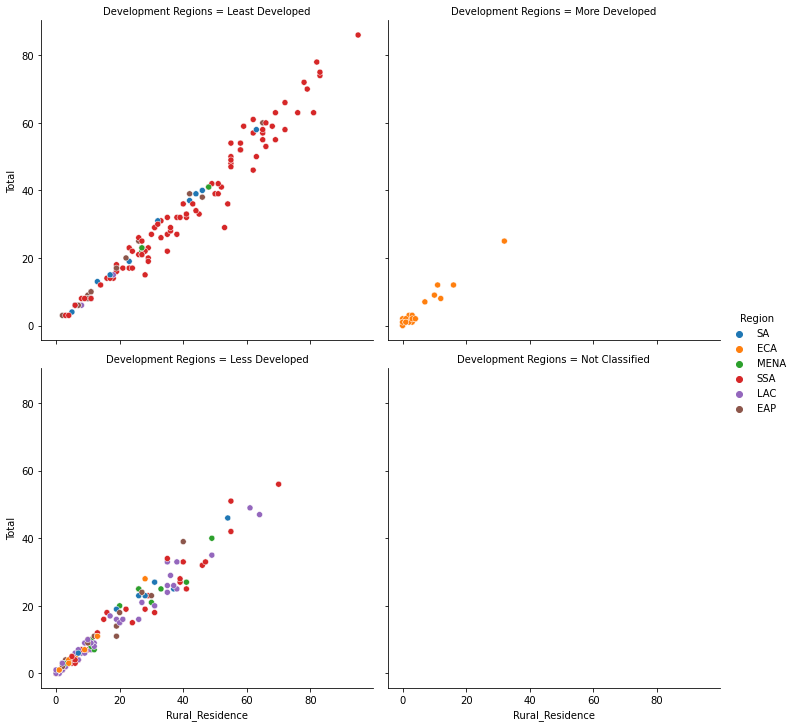

In [14]:
#Scatter plot to see the relationship between Rural_Residence and Total to help answer first hypothesis.
sns.relplot(data=super_data_frame, x='Rural_Residence', y='Total', hue='Region', col='Development Regions', col_wrap=2);

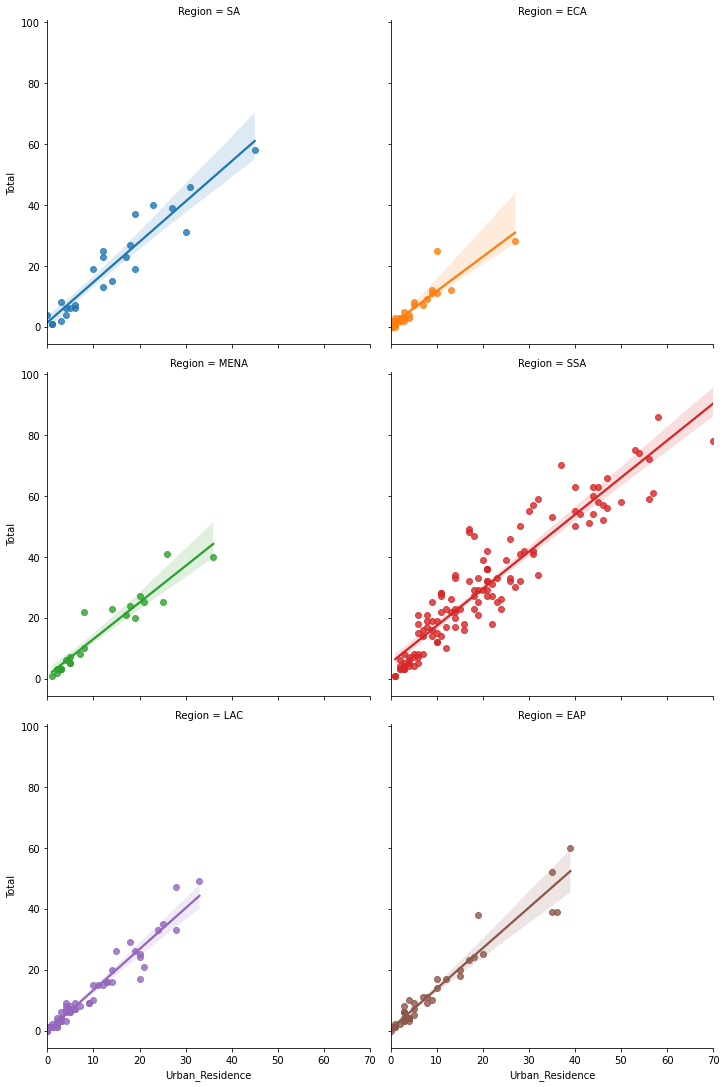

In [16]:
#Running lm plot to find relationship between Urban_Residence and Total and help answer second hypothesis.
sns.lmplot(x='Urban_Residence', y='Total', col='Region', hue='Region', data=super_data_frame, col_wrap=2);

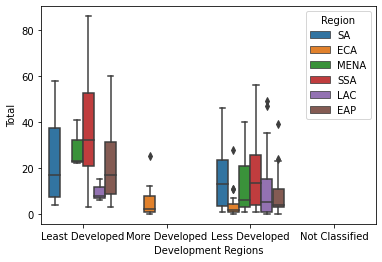

In [77]:
#Running a box plot to show relationship between Development Regions and Total and help answer third hypothesis.
sns.boxplot(x='Development Regions', y='Total', hue='Region', data=super_data_frame);